In [1]:
import sys
sys.path.append("../../code")

In [2]:
import gen

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #network architecture
        self.conv_layer = nn.Sequential(
            # Conv Layer Block 1: conv-bn-relu-conv-bn-relu-pool
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=7, stride=1, padding=3),  # 32
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=7, stride=1, padding=3),  # 32
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),  # 16

            # Conv Layer Block 2: conv-bn-relu-conv-bn-relu-pool
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),  # 16
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),  # 16
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),  # 8
            #     nn.Dropout2d(p=0.05),

            # Conv Layer Block 3: conv-bn-relu-conv-bn-relu-pool
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), # 8
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),  # 8
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2)   # 4
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(4 * 4 * 128, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            #     nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [5]:
train_model = CNN()

In [6]:
#adv_train(data_set, adv_sample_path, sample_num, sample_shape, train_model, model_lossfun, model_optimizer, config, METHOD_dataset_NET_TNET)
data_set = 'cifar10'
adv_sample_path = '../sample/FGSM_cifar10_CNN/train'
sample_num = 50000
sample_shape = [3,32,32]
model_lossfun = nn.CrossEntropyLoss()
model_optimizer = optim.SGD(train_model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
config = 'FGSM_cifar10_CNN_CNN.json'
METHOD_dataset_NET_TNET = 'FGSM_cifar10_CNN_CNN'

In [7]:
gen.adv_train(
    data_set, 
    adv_sample_path, 
    sample_num, 
    sample_shape, 
    train_model, 
    model_lossfun, 
    model_optimizer, 
    config, 
    METHOD_dataset_NET_TNET)

epoch:0/100
loss:14.02005100,cost:28.9171s
epoch:1/100
loss:9.07260609,cost:29.5432s
epoch:2/100
loss:6.46966410,cost:29.6346s
epoch:3/100
loss:4.47224712,cost:28.6378s
epoch:4/100
loss:2.87735510,cost:28.1968s
epoch:5/100
loss:1.81803858,cost:28.0238s
epoch:6/100
loss:1.13479209,cost:28.9159s
epoch:7/100
loss:0.66860199,cost:30.5887s
epoch:8/100
loss:0.32730919,cost:28.4284s
epoch:9/100
loss:0.14186290,cost:29.0809s
epoch:10/100
loss:0.06215860,cost:28.2163s
epoch:11/100
loss:0.03730533,cost:28.6021s
epoch:12/100
loss:0.02924941,cost:30.5319s
epoch:13/100
loss:0.02483355,cost:28.6841s
epoch:14/100
loss:0.02175158,cost:28.7853s
epoch:15/100
loss:0.01944074,cost:29.1418s
epoch:16/100
loss:0.01762674,cost:28.4660s
epoch:17/100
loss:0.01615378,cost:28.0524s
epoch:18/100
loss:0.01493059,cost:28.5505s
epoch:19/100
loss:0.01389838,cost:29.2216s
epoch:20/100
loss:0.01301043,cost:29.0089s
epoch:21/100
loss:0.01224277,cost:28.7308s
epoch:22/100
loss:0.01157105,cost:29.6260s
epoch:23/100
loss:0.

In [7]:
import val

In [8]:
adv_model = torch.load('../model/adv_train/FGSM_cifar10_CNN_CNN/model.pkl')

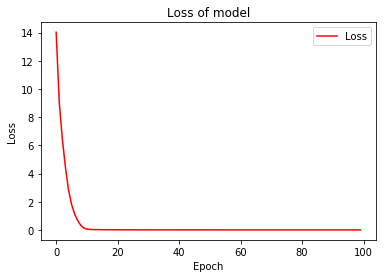

In [9]:
# make_loss_curve(loss_file, file_type)
val.make_loss_curve(
    loss_file = '../model/adv_train/FGSM_cifar10_CNN_CNN/loss.txt',
    file_type = 'adv_train')

In [10]:
import tst

In [11]:
tst.accuracy_test(
    model = adv_model, 
    data_set = 'cifar10'
    )

accuracy:73.950000%


## FGSM

In [12]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_cifar10_CNN/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:20.110000%


In [13]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_cifar10_ResNet9/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:33.580000%


In [14]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_cifar10_ResNet34/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:32.300000%


## JSMA

In [16]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_cifar10_CNN/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:81.470000%


In [17]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_cifar10_ResNet9/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:80.440000%


In [18]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_cifar10_ResNet34/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:57.160000%


## DEEPFOOL

In [19]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_cifar10_CNN/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:25.380000%


In [20]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_cifar10_ResNet9/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:29.150000%


In [21]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_cifar10_ResNet34/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:28.300000%


## PGD

In [22]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_cifar10_CNN/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:24.820000%


In [23]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_cifar10_ResNet9/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:26.370000%


In [24]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_cifar10_ResNet34/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:26.520000%


## THREAT

In [15]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/THREAT_cifar10/test',
    sample_num = 10000,
    sample_shape = [3,32,32]
)

fooling_rate:41.720000%
